In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset.csv")
X = df.loc[:, df.columns != 'TOTEXPPQ']
X['INCOME'] = np.log(X['INCOME'] + 1)
y = np.log(df.TOTEXPPQ + 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)

/var/folders/0j/_v5_yqld1dd300vth52bsm580000gn/T/ipykernel_82266/3222341909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INCOME'] = np.log(X['INCOME'] + 1)


In [53]:
def cal_scores(pred,act):
    mae = np.round(np.mean(np.abs(pred - act.values)), 4)
    mse = np.round(np.mean((pred - act.values)**2), 4)
    rmse = np.round(np.sqrt(np.mean((pred - act.values)**2)), 4)
    print("MSE: " + str(mse))
    print("MAE: " + str(mae))
    print("RMSE: " + str(rmse))

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

No handles with labels found to put in legend.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

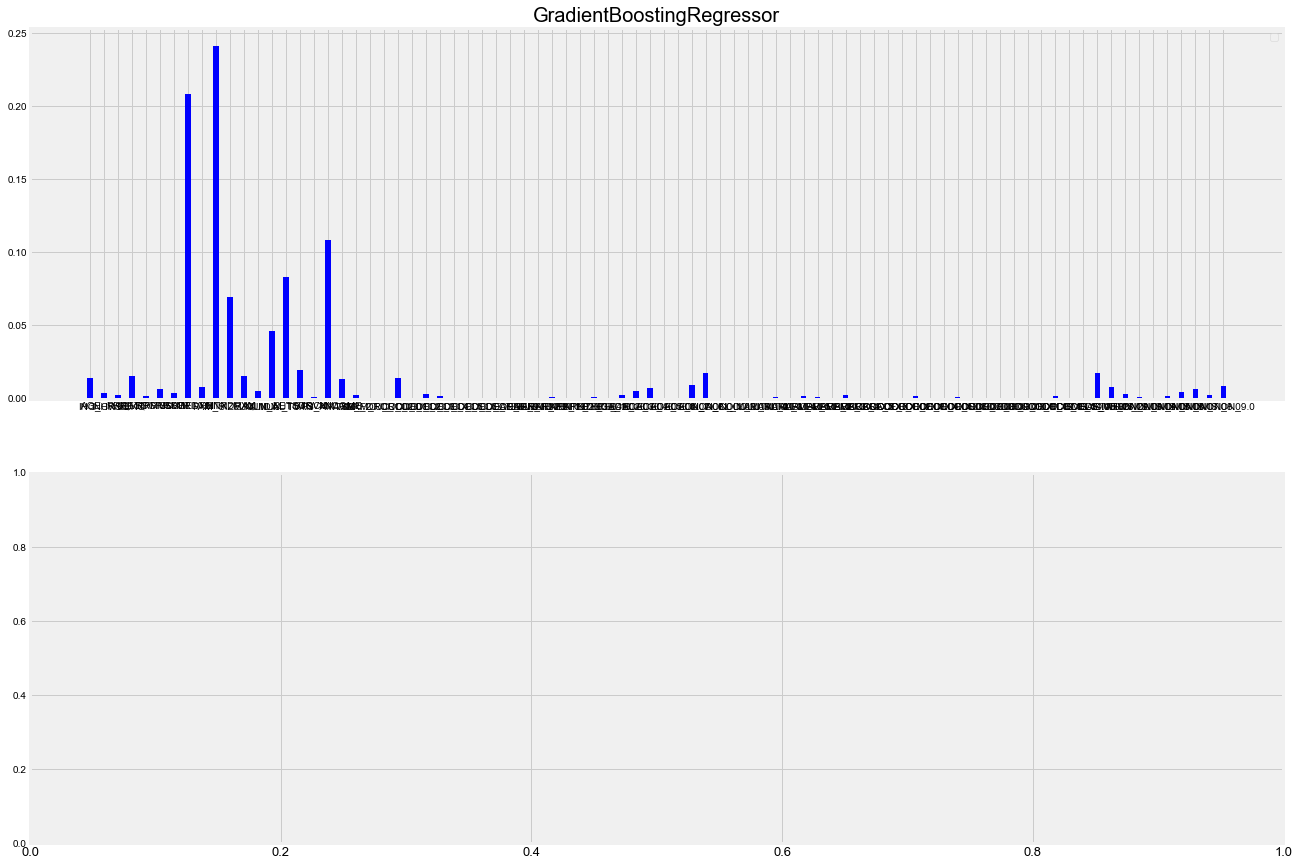

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['SimHei','Arial']})
%matplotlib inline

gbcf=GradientBoostingRegressor(max_depth=4,random_state=1, max)
gbcf_prediction=gbcf.fit(X_train,y_train)
cal_scores(np.e**gbcf.predict(X_test),np.e**y_test)

In [71]:
cal_scores(gbcf.predict(X_test),y_test)

MSE: 0.3012
MAE: 0.4361
RMSE: 0.5488


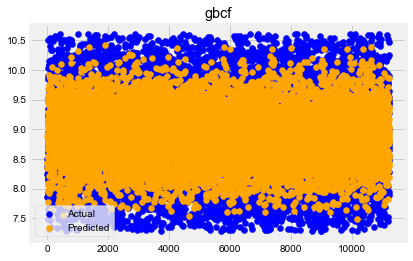

In [ ]:
y_pred_gbcf = gbcf.predict(X_test)
plt.scatter(np.arange(len(X_test)),y_test,label = 'Actual',color = 'blue')
plt.scatter(np.arange(len(X_test)),y_pred_gbcf,label = 'Predicted',color = 'orange')
plt.title('gbcf')
plt.legend()

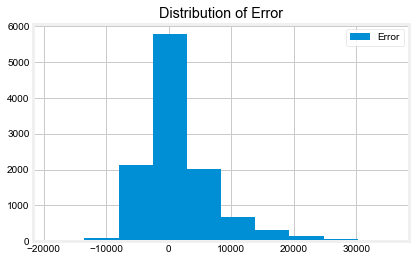

In [63]:
y_pred_gbcf = gbcf.predict(X_test)
error =  np.exp(y_test) - np.exp(y_pred_gbcf)
plt.hist(error,label = 'Error')
plt.title('Distribution of Error')
plt.legend()

In [68]:
from sklearn.metrics import r2_score
np.round(r2_score(y_test, gbcf.predict(X_test)), 4)

0.441

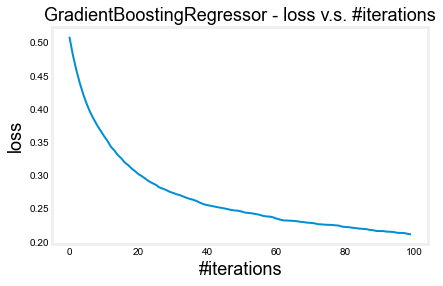

In [49]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.xlabel("#iterations", fontsize = 18)
plt.ylabel("loss", fontsize = 18)
plt.title('loss v.s. #iterations', fontsize = 18)
plt.grid(None)
plt.plot(range(len(gbcf.train_score_)),gbcf.train_score_, 
         linewidth=2, linestyle='-', )